In [1]:
import pandas as pd
from pandas import DataFrame
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import pyplot

In [224]:
#Read in csv file
Relax_Data = pd.read_csv(r"C:/Users/hfallah/Downloads/1481069814_relax_challenge/relax_challenge/takehome_users.csv", encoding='latin-1')
Relax_Data_Adopted = pd.read_csv(r"C:/Users/hfallah/Downloads/1481069814_relax_challenge/relax_challenge/takehome_user_engagement.csv", encoding='latin-1')

print("Dataset 1" , Relax_Data.head())
print("Dataset 2" , Relax_Data_Adopted.head())

Dataset 1    object_id        creation_time               name  \
0          1  2014-04-22 03:53:30     Clausen August   
1          2  2013-11-15 03:45:04      Poole Matthew   
2          3  2013-03-19 23:14:52  Bottrill Mitchell   
3          4  2013-05-21 08:09:28    Clausen Nicklas   
4          5  2013-01-17 10:14:20          Raw Grace   

                        email creation_source  last_session_creation_time  \
0    AugustCClausen@yahoo.com    GUEST_INVITE                1.398139e+09   
1      MatthewPoole@gustr.com      ORG_INVITE                1.396238e+09   
2  MitchellBottrill@gustr.com      ORG_INVITE                1.363735e+09   
3   NicklasSClausen@yahoo.com    GUEST_INVITE                1.369210e+09   
4          GraceRaw@yahoo.com    GUEST_INVITE                1.358850e+09   

   opted_in_to_mailing_list  enabled_for_marketing_drip  org_id  \
0                         1                           0      11   
1                         0                           0 

In [225]:
print(Relax_Data.info())
print(Relax_Data_Adopted.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null object
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
time_stamp    207917 non-null object
user_id       207917 non-null int64
visited       207917 non-null int64
dtypes: int64(2), object(1)
memory usage: 4.8+ MB
None


In [226]:
from datetime import datetime
Relax_Data_Adopted['time_stamp'] = [datetime.strptime(x, "%Y-%m-%d %H:%M:%S")for x in Relax_Data_Adopted['time_stamp'] ]
Relax_Data_Adopted = Relax_Data_Adopted.set_index(['time_stamp'])

In [227]:
#group by week
group_week = Relax_Data_Adopted.groupby('user_id').resample('1W').sum()
group_week = group_week[group_week['user_id'].isnull()==False].drop('user_id',axis=1)
group_week['Adopted_User'] = group_week['visited']
del group_week['visited']
group_week.head(20)

Adopted_User
user_id time_stamp              
1       2014-04-27           1.0
2       2013-11-17           1.0
        2013-12-01           1.0
        2013-12-15           1.0
        2013-12-29           1.0
        2014-01-05           1.0
        2014-01-12           1.0
        2014-02-09           3.0
        2014-02-16           2.0
        2014-03-09           1.0
        2014-03-16           1.0
        2014-04-06           1.0
3       2013-03-24           1.0
4       2013-05-26           1.0
5       2013-01-27           1.0
6       2013-12-22           1.0
7       2012-12-23           1.0
10      2013-01-20           1.0
        2013-01-27           1.0
        2013-02-03           1.0

In [228]:
#Filter on logins for 3 seperate days
adopted_user = group_week[group_week['Adopted_User']>=3]
adopted_user = adopted_user.reset_index()
del adopted_user['time_stamp']
adopted_user['Adopted_User'] =1
adopted_user = adopted_user.drop_duplicates()
adopted_user = adopted_user.set_index('user_id')
adopted_user.head()

,Adopted_User
user_id,
2,1
10,1
20,1
33,1
42,1


In [229]:
Relax_Data = Relax_Data.merge(adopted_user,left_index=True,right_index=True,how='left')
Relax_Data['Adopted_User'].fillna(0, inplace=True)
Relax_Data.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,Adopted_User
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,0.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,1.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0.0


In [230]:
#Look at org_id
Relax_Data.org_id.value_counts()

#Too many org_ids, choose 0-10

0      319
1      233
2      201
3      168
4      159
6      138
5      128
9      124
7      119
10     104
8       97
14      87
11      75
12      75
17      74
18      73
13      72
16      72
20      68
15      64
24      63
25      62
28      61
23      60
30      59
22      58
33      57
40      57
21      56
27      55
      ... 
399     13
410     13
322     12
387     12
346     12
407     12
295     12
354     12
344     12
405     12
381     12
356     12
301     12
232     12
364     11
183     11
365     11
352     10
353     10
294     10
378     10
304     10
395      9
315      9
355      9
396      9
400      8
397      8
386      7
416      2
Name: org_id, Length: 417, dtype: int64

In [231]:
#Need to create dummy variables for creation_source, org_id
Relax_Data = pd.get_dummies(Relax_Data, columns = ['creation_source','org_id'])
Relax_Data.head()

,object_id,creation_time,name,email,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,invited_by_user_id,Adopted_User,creation_source_GUEST_INVITE,...,org_id_407,org_id_408,org_id_409,org_id_410,org_id_411,org_id_412,org_id_413,org_id_414,org_id_415,org_id_416
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,1.398139e+09,1,0,10803.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,1.396238e+09,0,0,316.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,1.363735e+09,0,0,1525.0,1.0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,1.369210e+09,0,0,5151.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,1.358850e+09,0,0,5240.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0


In [232]:
#Drop unnecessary variables
Relax_Data = Relax_Data.set_index('object_id')
Relax_Data = Relax_Data.drop(['last_session_creation_time',
                              'invited_by_user_id', 'name', 'email', 'creation_time'], axis=1)
Relax_Data = Relax_Data.iloc[:,:19]
Relax_Data.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,Adopted_User,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH,org_id_0,org_id_1,org_id_2,org_id_3,org_id_4,org_id_5,org_id_6,org_id_7,org_id_8,org_id_9,org_id_10
object_id,,,,,,,,,,,,,,,,,,,
1,1,0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
5,0,0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


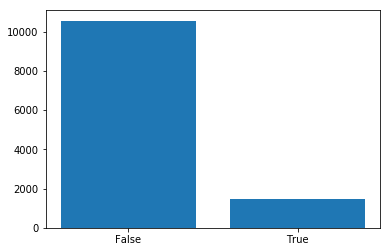

In [233]:
#Check if Adopted User Variable is balanced
a_u = list(Relax_Data.Adopted_User.value_counts().index)
a_u_counts = list(Relax_Data.Adopted_User.value_counts())
plt.bar(a_u, a_u_counts, align='center')
plt.xticks(a_u, ('False', 'True'))
plt.show()

#Not balanced, something to consider.

In [244]:
#Lets try undersampling to see if that helps with class imbalance.
temp1 = Relax_Data[Relax_Data.Adopted_User ==0]
temp2 = Relax_Data[Relax_Data.Adopted_User ==1]

temp3 = temp1.iloc[:4000,:]
Relax_Data2 = pd.concat([temp3,temp2])

In [254]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV,train_test_split


y = Relax_Data.pop('Adopted_User')
x = Relax_Data

In [255]:
Relax_Data2.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH,org_id_0,org_id_1,org_id_2,org_id_3,org_id_4,org_id_5,org_id_6,org_id_7,org_id_8,org_id_9,org_id_10
object_id,,,,,,,,,,,,,,,,,,
1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [256]:
X_train,X_test,y_train,y_test = train_test_split(x, y, test_size = 0.10,random_state=5)

In [257]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

graboost = GradientBoostingClassifier(max_features='sqrt')
parametergra = {'n_estimators':[40,45,50,55,60],'learning_rate':[.01,0.02,0.03,0.04,0.05],
              'max_depth':[1,2,3,4,5]}
grid1 = GridSearchCV(estimator=graboost,param_grid=parametergra,
                     scoring='accuracy',cv=5)
grid1.fit(X_train,y_train)
best_para_gra = grid1.best_params_
best_acc_gra = grid1.best_score_

print('The Tuned Paratmers :\n',best_para_gra,'\nAchieved %s Percent Accuracy' %(best_acc_gra*100))

The Tuned Paratmers :
 {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 40} 
Achieved 87.8703703704 Percent Accuracy


In [258]:
gbm = GradientBoostingClassifier(max_features='sqrt',
                                 n_estimators=50,learning_rate=.04,max_depth= 4)
gbm.fit(X_train,y_train)
feature_coef = pd.DataFrame(gbm.feature_importances_).transpose()
feature_coef.columns = list(Relax_Data.columns)
feature_coef.index = ['GBM'] 
feature_coef.transpose().sort_values(by='GBM',ascending=False)

,GBM
creation_source_GUEST_INVITE,0.133096
enabled_for_marketing_drip,0.119216
opted_in_to_mailing_list,0.109961
creation_source_PERSONAL_PROJECTS,0.098157
org_id_4,0.070205
creation_source_ORG_INVITE,0.069555
creation_source_SIGNUP,0.068345
creation_source_SIGNUP_GOOGLE_AUTH,0.066139
org_id_7,0.051502
org_id_5,0.038989


             precision    recall  f1-score   support

        0.0     0.8926    0.9915    0.9395      1065
        1.0     0.4706    0.0593    0.1053       135

avg / total     0.8452    0.8867    0.8456      1200



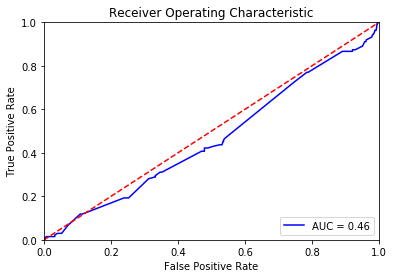

In [259]:
#Precision Recall
print(classification_report(y_test, final_model.predict(X_test), digits=4))

# Compute ROC curve 
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = gbm.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Best: 0.878704 using {'n_estimators': 180, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': None}
Final Accuracy: 0.886666666667
             precision    recall  f1-score   support

        0.0     0.8874    0.9991    0.9399      1065
        1.0     0.0000    0.0000    0.0000       135

avg / total     0.7876    0.8867    0.8342      1200



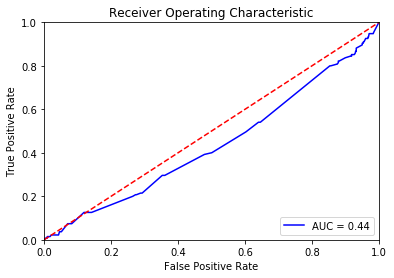

In [260]:
#Random Forest
rf = RandomForestClassifier()
max_depth=[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None]
min_samples_leaf = [1, 2, 4]
min_samples_split = [2, 5, 10]
n_estimators = [130, 180, 230]
param_grid = dict(max_depth=max_depth, min_samples_leaf=min_samples_leaf,
                  min_samples_split=min_samples_split,n_estimators=n_estimators)
random = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, cv = 3, n_jobs=-1)


random_result = random.fit(X_train, y_train)
# Summarize results
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))



final_model = RandomForestClassifier(n_estimators=130, min_samples_split=2, min_samples_leaf=1, max_depth=110)
final_model.fit(X_train, y_train)
print ("Final Accuracy: %s" 
       % accuracy_score(y_test, final_model.predict(X_test)))


#Precision Recall
print(classification_report(y_test, final_model.predict(X_test), digits=4))

# Compute ROC curve 
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = final_model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

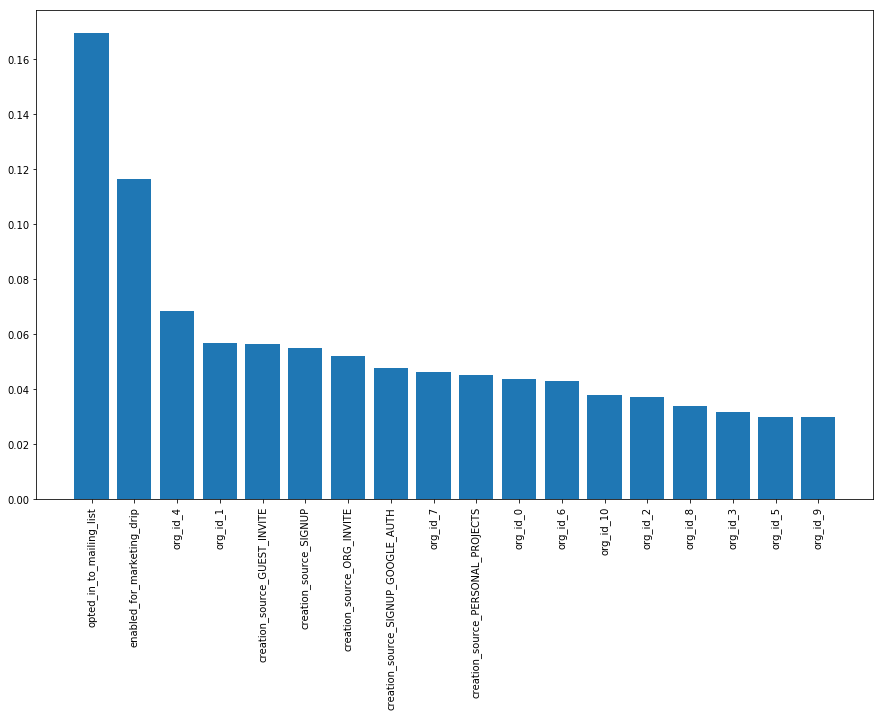

In [261]:
#Key features
# calculate feature importances
features = final_model.feature_importances_

# sort feature importances in descending order
key_feat = np.argsort(features)[::-1]

# rearrange feature names so they match the sorted feature importances
key_feat_ = [X_test.columns[i] for i in key_feat]

plt.figure(figsize = (15, 9))
plt.bar(range(X_test.shape[1]), features[key_feat])
plot = plt.xticks(range(X_test.shape[1]), key_feat_, rotation = 90)
plt.show()